In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='R&D Spend', ylabel='Profit'>

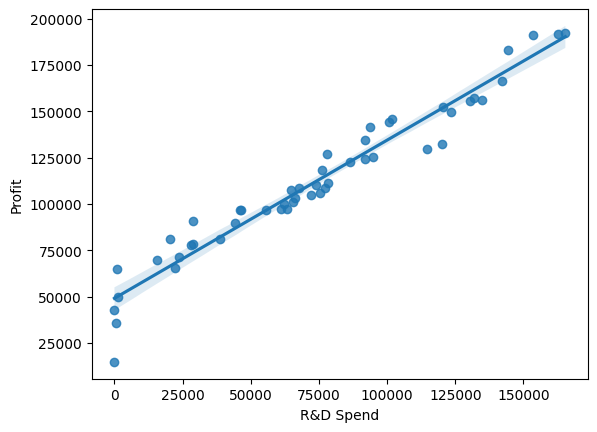

In [4]:
sns.regplot(x='R&D Spend', y = 'Profit', data=df)

<Axes: xlabel='Administration', ylabel='Profit'>

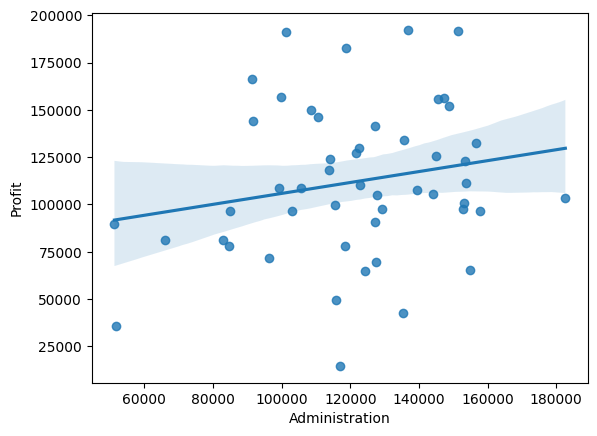

In [5]:
sns.regplot(x='Administration', y = 'Profit', data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

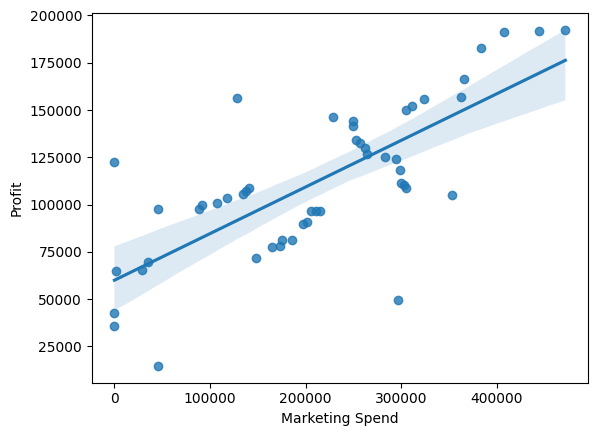

In [6]:
sns.regplot(x='Marketing Spend', y = 'Profit', data=df)

In [ ]:
x= df.drop('Profit', axis = 1)
y = df['Profit']

In [8]:
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Model Training

In [12]:
cat_cols = ['State']
ohe = OneHotEncoder(drop='first')
X_encoded = ohe.fit_transform(df[cat_cols]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns= ohe.get_feature_names_out(cat_cols))
X_encoded_df.head()


,State_Florida,State_New York
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [ ]:
clean_df = pd.concat([df, X_encoded_df], axis=1).drop(cat_cols, axis = 1)
clean_df

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include = ['int64', float])
